**This notebook was built on Google Colab so if some code block does not work in Jupyter or any other environemnt, try using Colab for error less code outputs**

This is my complete guide, workflow and template for all the important data preprocessing steps in order to be carried out so that it can be easily and efficiently digested by ML models. In the end I have trained KNN classifier and produced accuracy score so that you can chnage the conditions and compare the model accuracy in different circumstances given.

The link for original dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset. I have provided the dataset (inside 'data' folder) so it is recommended to download the given data rather than going on the link and downloading/splitting the dataset before it can be used in this notebook. 

Data Pre-processing workflow:

___

## 1. Loading the Dataset


I have used a subset of the Loan Prediction dataset. You can download the training and testing dataset from the folder 'data'

Note : Testing data that you are provided is the subset of the training data from Loan Prediction problem.

 

Now, lets get started by importing important packages and the dataset.

**1.1 Import the necessary Python modules**

In [1]:
# Load python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection


**1.2 Load Dataset **


We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.


In [2]:
# Load dataset from local drive (for colab notebook)
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file
train_dataset = pd.read_csv(io.BytesIO(uploaded['X_train.csv']))

uploaded = files.upload()    # Will prompt you to select file
train_labels = pd.read_csv(io.BytesIO(uploaded['Y_train.csv']))

uploaded = files.upload()    # Will prompt you to select file
test_dataset = pd.read_csv(io.BytesIO(uploaded['X_test.csv']))

uploaded = files.upload()    # Will prompt you to select file
test_labels = pd.read_csv(io.BytesIO(uploaded['Y_test.csv']))




Saving X_train.csv to X_train.csv


Saving Y_train.csv to Y_train.csv


Saving X_test.csv to X_test.csv


Saving Y_test.csv to Y_test.csv


(https://)**1.2.1 Inspect Dataset **

**1.2.1.1 Dimensions of Dataset **


In [3]:
# shape
print(train_dataset.shape)
print(train_labels.shape)
# dataset representation
train_dataset.head()

(391, 12)
(391, 1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban


In [4]:
print(test_dataset.shape)
print(test_labels.shape)

(96, 12)
(96, 1)


In [5]:
# list of column titles 
print(train_dataset.columns)
print(train_labels.columns)

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History',
       u'Property_Area'],
      dtype='object')
Index([u'Target'], dtype='object')


In [6]:
# list of column (field) data types
print(train_dataset.dtypes)
print(train_labels.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Target    object
dtype: object


**1.2.1.2 Take a peek at the Dataset **

Note that "NaN" means "Not a Number". It is not the same as 0. Python replaces empty fields with "NaN".


In [7]:
# head
train_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban
5,LP002244,Male,Yes,0,Graduate,No,2333.0,2417.0,136.0,360.0,1.0,Urban
6,LP001854,Male,Yes,3+,Graduate,No,5250.0,0.0,94.0,360.0,1.0,Urban
7,LP002505,Male,Yes,0,Graduate,No,4333.0,2451.0,110.0,360.0,1.0,Urban
8,LP002862,Male,Yes,2,Not Graduate,No,6125.0,1625.0,187.0,480.0,1.0,Semiurban
9,LP001630,Male,No,0,Not Graduate,No,2333.0,1451.0,102.0,480.0,0.0,Urban


##2. Managing Missing Data

Sometimes you may find some data are missing in the dataset. If the missing values are not handled properly inaccurate inference about the data may result. Due to improper handling, the result obtained will differ from ones where the missing values are present. 

Since missing values can tangibly reduce prediction accuracy, this step needs to be a priority. In terms of machine learning, assumed or approximated values are “more appropriate” for an algorithm than just missing ones.  Even if you don’t know the exact value, methods exist to better “assume” which value is missing or bypass the issue. So how to сlean the data here? Choosing the right approach also heavily depends on data and the domain you have:
* Substitute missing values with dummy values, e.g. n/a for categorical or 0 for numerical values.
* Substitute the missing numerical values with mean figures.
* For categorical values, you can also use the most frequent items to fill in.

### 2.1 Removing Missing Data

So how can we handle missing data. One obvious idea is to remove the lines (observations recorded in the rows) where there is some missing data. That is ok if you’ve got large datasets. The dataset we have here is considerably small, so removing data will have crucial impact. We will therefore need to look for alternative methods to deal with the missing data. Removing removing rows can be quite dangerous as you will be deleting crucial information.

The decission to remove data will depend on the size of dataset and the problem domain (type of data collected).

Assuming it was appropriate to remove observation rows, the following code will help. 
Given the original dataset in figure 2, we could remove rows 4 and 6 as they containg missing data.



**2.1.1 Remove all rows that contain missing data**


In [8]:
# remove all rows with missing data
train_dataset.dropna().head(6)
print('--------------------------------------------------------------')
train_dataset.head(6)



--------------------------------------------------------------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban
5,LP002244,Male,Yes,0,Graduate,No,2333.0,2417.0,136.0,360.0,1.0,Urban


**2.1.2 Remove specific rows**

Drop specific rows by passing index labels to the drop method.

In [9]:
# remove selected rows

print(train_dataset.drop([0]).head(6))


    Loan_ID Gender Married Dependents Education Self_Employed  \
1  LP001032   Male      No          0  Graduate            No   
2  LP001824   Male     Yes          1  Graduate            No   
3  LP002928   Male     Yes          0  Graduate            No   
4  LP001814   Male     Yes          2  Graduate            No   
5  LP002244   Male     Yes          0  Graduate            No   
6  LP001854   Male     Yes         3+  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           4950.0                0.0       125.0             360.0   
2           2882.0             1843.0       123.0             480.0   
3           3000.0             3416.0        56.0             180.0   
4           9703.0                0.0       112.0             360.0   
5           2333.0             2417.0       136.0             360.0   
6           5250.0                0.0        94.0             360.0   

   Credit_History Property_Area  
1           

**2.1.3 Remove specific columns**

Usually you would drop particular columns especially if all or most of its values are missing. The drop method can also be used here with parameters to define the column title and axis=1 to denote that we want to drop a column.


In [10]:
# remove selected column

print(train_dataset.drop("Gender", axis=1))

      Loan_ID Married Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001031      No          0      Graduate            No              NaN   
1    LP001032      No          0      Graduate            No           4950.0   
2    LP001824     Yes          1      Graduate            No           2882.0   
3    LP002928     Yes          0      Graduate            No           3000.0   
4    LP001814     Yes          2      Graduate            No           9703.0   
5    LP002244     Yes          0      Graduate            No           2333.0   
6    LP001854     Yes         3+      Graduate            No           5250.0   
7    LP002505     Yes          0      Graduate            No           4333.0   
8    LP002862     Yes          2  Not Graduate            No           6125.0   
9    LP001630      No          0  Not Graduate            No           2333.0   
10   LP001964     Yes          0  Not Graduate            No           1800.0   
11   LP001098     Yes       

In [11]:
# remove multiple selected columns

print(train_dataset.drop(["Gender", "Married"], axis=1))

      Loan_ID Dependents     Education Self_Employed  ApplicantIncome  \
0    LP001031          0      Graduate            No              NaN   
1    LP001032          0      Graduate            No           4950.0   
2    LP001824          1      Graduate            No           2882.0   
3    LP002928          0      Graduate            No           3000.0   
4    LP001814          2      Graduate            No           9703.0   
5    LP002244          0      Graduate            No           2333.0   
6    LP001854         3+      Graduate            No           5250.0   
7    LP002505          0      Graduate            No           4333.0   
8    LP002862          2  Not Graduate            No           6125.0   
9    LP001630          0  Not Graduate            No           2333.0   
10   LP001964          0  Not Graduate            No           1800.0   
11   LP001098          0      Graduate            No           3500.0   
12   LP002149          2      Graduate            N

** 2.1.4 Remove all rows where data satisfies a condition in a particular column**

Drop all rows where Gender is Female (and NaN). So filter the dataframe where Gender is Male.


In [ ]:
# remove all rows where Gender is Female (and NaN).

print(train_dataset[train_dataset["Gender"] == "Male"])

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001031   Male      No          0      Graduate            No   
1    LP001032   Male      No          0      Graduate            No   
2    LP001824   Male     Yes          1      Graduate            No   
3    LP002928   Male     Yes          0      Graduate            No   
4    LP001814   Male     Yes          2      Graduate            No   
5    LP002244   Male     Yes          0      Graduate            No   
6    LP001854   Male     Yes         3+      Graduate            No   
7    LP002505   Male     Yes          0      Graduate            No   
8    LP002862   Male     Yes          2  Not Graduate            No   
9    LP001630   Male      No          0  Not Graduate            No   
10   LP001964   Male     Yes          0  Not Graduate            No   
11   LP001098   Male     Yes          0      Graduate            No   
12   LP002149   Male     Yes          2      Graduate            No   
13   L

** 2.1.4 Remove all rows where data satisfies a condition in a particular column**

Drop all rows where Gender is not Male. So keep rows where Gender is Female or NaN.

In [ ]:
# remove all rows where Gender is Female (and NaN).

print(train_dataset[train_dataset["Gender"] != "Male"])

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
15   LP001871  Female      No          0      Graduate            No   
24   LP002804  Female     Yes          0      Graduate            No   
25   LP001327  Female     Yes          0      Graduate            No   
27   LP002990  Female      No          0      Graduate           Yes   
37   LP002341  Female      No          1      Graduate            No   
56   LP001925  Female      No          0      Graduate           Yes   
58   LP001888  Female      No          0      Graduate            No   
68   LP001931  Female      No          0      Graduate            No   
71   LP001577  Female     Yes          0      Graduate            No   
73   LP001157  Female      No          0      Graduate            No   
76   LP002840  Female      No          0      Graduate            No   
81   LP001974  Female      No          0      Graduate            No   
83   LP001404  Female     Yes          0      Graduate          

**2.1.5 Remove all rows where data is missing in a particular column**

Remove all rows where a particular column has a missing value. This will result in a dataset that has no missing values in that particular column.


In [ ]:
# remove all rows where ApplicantIncome is missing.
# 1. check to see if there are missing data in the ApplicantIncome column
print(train_dataset["ApplicantIncome"].isnull().sum())

print("----------------------")

print(train_dataset.head(20))
print("----------------------")

# 2. drop all rows where a value for ApplicantIncome is missing
print(train_dataset[train_dataset["ApplicantIncome"].notnull()])
# train_dataset["ApplicantIncome"].notnull() # This line actually returns an array of boolean values for specified condition 

# the first row contains a null and is removed



4
----------------------
     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001031    Male      No          0      Graduate            No   
1   LP001032    Male      No          0      Graduate            No   
2   LP001824    Male     Yes          1      Graduate            No   
3   LP002928    Male     Yes          0      Graduate            No   
4   LP001814    Male     Yes          2      Graduate            No   
5   LP002244    Male     Yes          0      Graduate            No   
6   LP001854    Male     Yes         3+      Graduate            No   
7   LP002505    Male     Yes          0      Graduate            No   
8   LP002862    Male     Yes          2  Not Graduate            No   
9   LP001630    Male      No          0  Not Graduate            No   
10  LP001964    Male     Yes          0  Not Graduate            No   
11  LP001098    Male     Yes          0      Graduate            No   
12  LP002149    Male     Yes          2      Graduat

### 2.2 Filling in Missing Data

As alternative to removing rows with missing data, you can estimate plausible values for the missing data instead. For example, replace the missing data within a column with a value equivalent to the mean of all the values in that column. That can also be applied to every feature where there is missing data.


We will use the scikit-learn library. The impute class allows us to manipulate the missing data.


At first we will create an object of the imputer class. 
The class has an argument called 'strategy' which shows what method to use to generate a value replacement for the missing value. 'mean' is the default value for strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [ ]:
print(train_dataset["Gender"].isnull().sum())

print("----------------------")

print(train_dataset["ApplicantIncome"].isnull().sum())



1
----------------------
4


In [ ]:
# handling missing data
from sklearn.impute import SimpleImputer 

train_dataset_no_nans =  train_dataset.copy()

# 1. Imputer object preperation, stating the strategy here
imptr = SimpleImputer(missing_values = np.nan, strategy = 'mean')  


# 2. Fit the imputer object to the feature matrix (mean strategy is only for numeric features)
imptr = imptr.fit(train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = \
imptr.transform(train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]) 

train_dataset_no_nans



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,5134.046512,0.00000,125.0,360.0,1.00000,Urban
1,LP001032,Male,No,0,Graduate,No,4950.000000,0.00000,125.0,360.0,1.00000,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.000000,1843.00000,123.0,480.0,1.00000,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.000000,3416.00000,56.0,180.0,1.00000,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.000000,0.00000,112.0,360.0,1.00000,Urban
5,LP002244,Male,Yes,0,Graduate,No,2333.000000,2417.00000,136.0,360.0,1.00000,Urban
6,LP001854,Male,Yes,3+,Graduate,No,5250.000000,0.00000,94.0,360.0,1.00000,Urban
7,LP002505,Male,Yes,0,Graduate,No,4333.000000,2451.00000,110.0,360.0,1.00000,Urban
8,LP002862,Male,Yes,2,Not Graduate,No,6125.000000,1625.00000,187.0,480.0,1.00000,Semiurban
9,LP001630,Male,No,0,Not Graduate,No,2333.000000,1451.00000,102.0,480.0,0.00000,Urban


In [ ]:
#Test_dataset same steps
# handling missing data
from sklearn.impute import SimpleImputer 

test_dataset_no_nans =  test_dataset.copy()

# 1. Imputer object preperation
imptr = SimpleImputer(missing_values = np.nan, strategy = 'mean')  


# 2. Fit the imputer object to the feature matrix (mean strategy is only for numeric features)
imptr = imptr.fit(test_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
test_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = \
imptr.transform(test_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]) 

test_dataset_no_nans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002684,Female,No,0,Not Graduate,No,3400.0,0.0,95.0,360.0,1.0,Rural
1,LP001907,Male,Yes,0,Graduate,No,14583.0,0.0,436.0,360.0,1.0,Semiurban
2,LP001205,Male,Yes,0,Graduate,No,2500.0,3796.0,120.0,360.0,1.0,Urban
3,LP001275,Male,Yes,1,Graduate,No,3988.0,0.0,50.0,240.0,1.0,Urban
4,LP002455,Male,Yes,2,Graduate,No,3859.0,0.0,96.0,360.0,1.0,Semiurban
5,LP001029,Male,No,0,Graduate,No,1853.0,2840.0,114.0,360.0,1.0,Rural
6,LP001345,Male,Yes,2,Not Graduate,No,4288.0,3263.0,133.0,180.0,1.0,Urban
7,LP001047,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban
8,LP002917,Female,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban
9,LP002515,Male,Yes,1,Graduate,Yes,3450.0,2079.0,162.0,360.0,1.0,Semiurban


In [ ]:
# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for numeric/categorical features)
imptr = imptr.fit(train_dataset[['Gender']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[['Gender']] = imptr.transform(train_dataset[['Gender']]) 


In [ ]:
#Test_dataset
# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for numeric/categorical features)
imptr = imptr.fit(test_dataset[['Gender']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
test_dataset_no_nans[['Gender']] = imptr.transform(test_dataset[['Gender']]) 

##############################################################################
##############################################################################
##############################################################################
##############################################################################




##  Activity no 1

Filling in the missing values for the categorical features









In [ ]:
### insert code here; work on the: train_dataset_no_nans

# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for numeric/categorical features)
imptr = imptr.fit(train_dataset[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']] = imptr.transform(train_dataset[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']]) 

train_dataset_no_nans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,5134.046512,0.00000,125.0,360.0,1.00000,Urban
1,LP001032,Male,No,0,Graduate,No,4950.000000,0.00000,125.0,360.0,1.00000,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.000000,1843.00000,123.0,480.0,1.00000,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.000000,3416.00000,56.0,180.0,1.00000,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.000000,0.00000,112.0,360.0,1.00000,Urban
5,LP002244,Male,Yes,0,Graduate,No,2333.000000,2417.00000,136.0,360.0,1.00000,Urban
6,LP001854,Male,Yes,3+,Graduate,No,5250.000000,0.00000,94.0,360.0,1.00000,Urban
7,LP002505,Male,Yes,0,Graduate,No,4333.000000,2451.00000,110.0,360.0,1.00000,Urban
8,LP002862,Male,Yes,2,Not Graduate,No,6125.000000,1625.00000,187.0,480.0,1.00000,Semiurban
9,LP001630,Male,No,0,Not Graduate,No,2333.000000,1451.00000,102.0,480.0,0.00000,Urban


In [ ]:
#Testdataset
### insert code here; work on the: train_dataset_no_nans

# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for numeric/categorical features)
imptr = imptr.fit(test_dataset[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
test_dataset_no_nans[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']] = imptr.transform(test_dataset[['Loan_ID','Gender','Dependents','Married','Education','Self_Employed','Property_Area']]) 

test_dataset_no_nans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002684,Female,No,0,Not Graduate,No,3400.0,0.0,95.0,360.0,1.0,Rural
1,LP001907,Male,Yes,0,Graduate,No,14583.0,0.0,436.0,360.0,1.0,Semiurban
2,LP001205,Male,Yes,0,Graduate,No,2500.0,3796.0,120.0,360.0,1.0,Urban
3,LP001275,Male,Yes,1,Graduate,No,3988.0,0.0,50.0,240.0,1.0,Urban
4,LP002455,Male,Yes,2,Graduate,No,3859.0,0.0,96.0,360.0,1.0,Semiurban
5,LP001029,Male,No,0,Graduate,No,1853.0,2840.0,114.0,360.0,1.0,Rural
6,LP001345,Male,Yes,2,Not Graduate,No,4288.0,3263.0,133.0,180.0,1.0,Urban
7,LP001047,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban
8,LP002917,Female,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban
9,LP002515,Male,Yes,1,Graduate,Yes,3450.0,2079.0,162.0,360.0,1.0,Semiurban


##############################################################################
##############################################################################
##############################################################################
##############################################################################




##3.  Categorical Data

Data Preprocessing in machine learning requires values of the data in numerical form. Therefore text values in the columns of datasets must be converted into numerical form. 

###3.1 Converting categorical to numerical values

Given the original dataset, it is clear we have a few categorical features. All these need to be encoded. The [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class is used to transform the categorical or string values to numerical ones (between 0 and n_classes-1).



In [ ]:
dummy = train_dataset_no_nans.copy()

# encode categorical data for the 'Gender' column
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
dummy['Gender'] = lblEncoder_X.fit_transform(dummy['Gender']) # apply LblEncoder object to our categorical variables (columns - 'Gender') using the fit_transform method. This returns the column encoded.

print(dummy)



      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001031       1      No          0      Graduate            No   
1    LP001032       1      No          0      Graduate            No   
2    LP001824       1     Yes          1      Graduate            No   
3    LP002928       1     Yes          0      Graduate            No   
4    LP001814       1     Yes          2      Graduate            No   
5    LP002244       1     Yes          0      Graduate            No   
6    LP001854       1     Yes         3+      Graduate            No   
7    LP002505       1     Yes          0      Graduate            No   
8    LP002862       1     Yes          2  Not Graduate            No   
9    LP001630       1      No          0  Not Graduate            No   
10   LP001964       1     Yes          0  Not Graduate            No   
11   LP001098       1     Yes          0      Graduate            No   
12   LP002149       1     Yes          2      Graduate          

Now let us try a different encoding strategy, the one-hot encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Gender']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_

dum = aaa.transform(train_dataset_no_nans[['Gender']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum

train_dataset_no_nans['Female'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Male'] = dum[:,1]       # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
train_dataset_no_nans= train_dataset_no_nans.drop(columns='Gender',axis=1)  # we delete the (former) column/feature Gender

train_dataset_no_nans

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,LP001031,No,0,Graduate,No,5134.046512,0.00000,125.0,360.0,1.00000,Urban,0.0,1.0
1,LP001032,No,0,Graduate,No,4950.000000,0.00000,125.0,360.0,1.00000,Urban,0.0,1.0
2,LP001824,Yes,1,Graduate,No,2882.000000,1843.00000,123.0,480.0,1.00000,Semiurban,0.0,1.0
3,LP002928,Yes,0,Graduate,No,3000.000000,3416.00000,56.0,180.0,1.00000,Semiurban,0.0,1.0
4,LP001814,Yes,2,Graduate,No,9703.000000,0.00000,112.0,360.0,1.00000,Urban,0.0,1.0
5,LP002244,Yes,0,Graduate,No,2333.000000,2417.00000,136.0,360.0,1.00000,Urban,0.0,1.0
6,LP001854,Yes,3+,Graduate,No,5250.000000,0.00000,94.0,360.0,1.00000,Urban,0.0,1.0
7,LP002505,Yes,0,Graduate,No,4333.000000,2451.00000,110.0,360.0,1.00000,Urban,0.0,1.0
8,LP002862,Yes,2,Not Graduate,No,6125.000000,1625.00000,187.0,480.0,1.00000,Semiurban,0.0,1.0
9,LP001630,No,0,Not Graduate,No,2333.000000,1451.00000,102.0,480.0,0.00000,Urban,0.0,1.0


In [ ]:
#TestDataset
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Gender']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_

dum = aaa.transform(test_dataset_no_nans[['Gender']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum

test_dataset_no_nans['Female'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Male'] = dum[:,1]       # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
test_dataset_no_nans= test_dataset_no_nans.drop(columns='Gender',axis=1)  # we delete the (former) column/feature Gender

test_dataset_no_nans

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,LP002684,No,0,Not Graduate,No,3400.0,0.0,95.0,360.0,1.0,Rural,1.0,0.0
1,LP001907,Yes,0,Graduate,No,14583.0,0.0,436.0,360.0,1.0,Semiurban,0.0,1.0
2,LP001205,Yes,0,Graduate,No,2500.0,3796.0,120.0,360.0,1.0,Urban,0.0,1.0
3,LP001275,Yes,1,Graduate,No,3988.0,0.0,50.0,240.0,1.0,Urban,0.0,1.0
4,LP002455,Yes,2,Graduate,No,3859.0,0.0,96.0,360.0,1.0,Semiurban,0.0,1.0
5,LP001029,No,0,Graduate,No,1853.0,2840.0,114.0,360.0,1.0,Rural,0.0,1.0
6,LP001345,Yes,2,Not Graduate,No,4288.0,3263.0,133.0,180.0,1.0,Urban,0.0,1.0
7,LP001047,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0.0,1.0
8,LP002917,No,0,Not Graduate,No,2165.0,0.0,70.0,360.0,1.0,Semiurban,1.0,0.0
9,LP002515,Yes,1,Graduate,Yes,3450.0,2079.0,162.0,360.0,1.0,Semiurban,0.0,1.0


##############################################################################
##############################################################################
##############################################################################
##############################################################################





##  Activity no 2

Performing label encoding and one-hot encoding for all categorical features.



In [ ]:
# LABEL ENCODING
# label encoding for Loan_ID
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Loan_ID'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Loan_ID'])

# label encoding for Gender 
# from sklearn.preprocessing import LabelEncoder
# lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
# train_dataset_no_nans['Gender'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Gender'])

# label encoding for Dependents
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Dependents'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Dependents'])

# label encoding for Married
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Married'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Married'])

# label encoding for Education
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Education'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Education'])

# label encoding for Self_Employed
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Self_Employed'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Self_Employed'])

# label encoding for Property_Area
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Property_Area'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Property_Area'])
train_dataset_no_nans




,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,11,0,0,0,0,5134.046512,0.00000,125.0,360.0,1.00000,2,0.0,1.0
1,12,0,0,0,0,4950.000000,0.00000,125.0,360.0,1.00000,2,0.0,1.0
2,156,1,1,0,0,2882.000000,1843.00000,123.0,480.0,1.00000,1,0.0,1.0
3,372,1,0,0,0,3000.000000,3416.00000,56.0,180.0,1.00000,1,0.0,1.0
4,155,1,2,0,0,9703.000000,0.00000,112.0,360.0,1.00000,2,0.0,1.0
5,241,1,0,0,0,2333.000000,2417.00000,136.0,360.0,1.00000,2,0.0,1.0
6,163,1,3,0,0,5250.000000,0.00000,94.0,360.0,1.00000,2,0.0,1.0
7,293,1,0,0,0,4333.000000,2451.00000,110.0,360.0,1.00000,2,0.0,1.0
8,363,1,2,1,0,6125.000000,1625.00000,187.0,480.0,1.00000,1,0.0,1.0
9,112,0,0,1,0,2333.000000,1451.00000,102.0,480.0,0.00000,2,0.0,1.0


In [ ]:
#TestDataset
# LABEL ENCODING
# label encoding for Loan_ID
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Loan_ID'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Loan_ID'])

# label encoding for Gender 
# from sklearn.preprocessing import LabelEncoder
# lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
# test_dataset_no_nans['Gender'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Gender'])

# label encoding for Dependents
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Dependents'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Dependents'])

# label encoding for Married
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Married'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Married'])

# label encoding for Education
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Education'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Education'])

# label encoding for Self_Employed
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Self_Employed'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Self_Employed'])

# label encoding for Property_Area
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Property_Area'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Property_Area'])
test_dataset_no_nans

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,87,0,0,1,0,3400.0,0.0,95.0,360.0,1.0,0,1.0,0.0
1,47,1,0,0,0,14583.0,0.0,436.0,360.0,1.0,1,0.0,1.0
2,7,1,0,0,0,2500.0,3796.0,120.0,360.0,1.0,2,0.0,1.0
3,12,1,1,0,0,3988.0,0.0,50.0,240.0,1.0,2,0.0,1.0
4,75,1,2,0,0,3859.0,0.0,96.0,360.0,1.0,1,0.0,1.0
5,1,0,0,0,0,1853.0,2840.0,114.0,360.0,1.0,0,0.0,1.0
6,15,1,2,1,0,4288.0,3263.0,133.0,180.0,1.0,2,0.0,1.0
7,3,1,0,1,0,2600.0,1911.0,116.0,360.0,0.0,1,0.0,1.0
8,92,0,0,1,0,2165.0,0.0,70.0,360.0,1.0,1,1.0,0.0
9,77,1,1,0,1,3450.0,2079.0,162.0,360.0,1.0,1,0.0,1.0


In [ ]:
# ONE-HOT ENCODING
# one-hot encoding for Loan_ID (not - because this will introduce so many more columns in our dataset)
# one-hot encoding for Married
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Married']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(train_dataset_no_nans[['Married']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
train_dataset_no_nans['Not_Married'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Married'] = dum[:,1]       # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
#train_dataset_no_nans= train_dataset_no_nans.drop(columns='Married',axis=1)  # we delete the (former) column/feature Gender

# one-hot encoding for Dependents
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Dependents']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(train_dataset_no_nans[['Dependents']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
train_dataset_no_nans['Dependents_0'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Dependents_1'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
train_dataset_no_nans['Dependents_2'] = dum[:,2]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
train_dataset_no_nans['Dependents_3'] = dum[:,3]
train_dataset_no_nans= train_dataset_no_nans.drop(columns='Dependents',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Education
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Education']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(train_dataset_no_nans[['Education']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
train_dataset_no_nans['Educated'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Not_Educated'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
train_dataset_no_nans= train_dataset_no_nans.drop(columns='Education',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Self_Employed
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Self_Employed']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(train_dataset_no_nans[['Self_Employed']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
train_dataset_no_nans['Self_Employed'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Not_Self_Educated'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
#train_dataset_no_nans= train_dataset_no_nans.drop(columns='Education',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Property_Area
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Property_Area']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(train_dataset_no_nans[['Property_Area']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
train_dataset_no_nans['Property_Area_0'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
train_dataset_no_nans['Property_Area_1'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
train_dataset_no_nans['Property_Area_2'] = dum[:,2]     
     
train_dataset_no_nans= train_dataset_no_nans.drop(columns='Property_Area',axis=1)  # we delete the (former) column/feature Gender


# categorical( Self_Employed Proper)
train_dataset_no_nans.columns

Index([u'Loan_ID', u'Married', u'Self_Employed', u'ApplicantIncome',
       u'CoapplicantIncome', u'LoanAmount', u'Loan_Amount_Term',
       u'Credit_History', u'Female', u'Male', u'Not_Married', u'Dependents_0',
       u'Dependents_1', u'Dependents_2', u'Dependents_3', u'Educated',
       u'Not_Educated', u'Not_Self_Educated', u'Property_Area_0',
       u'Property_Area_1', u'Property_Area_2'],
      dtype='object')

In [ ]:
#TestDataset
# ONE-HOT ENCODING
# one-hot encoding for Loan_ID (not - because this will introduce so many more columns in our dataset)
# one-hot encoding for Married
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Married']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(test_dataset_no_nans[['Married']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
test_dataset_no_nans['Not_Married'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Married'] = dum[:,1]       # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
#test_dataset_no_nans= test_dataset_no_nans.drop(columns='Married',axis=1)  # we delete the (former) column/feature Gender

# one-hot encoding for Dependents
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Dependents']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(test_dataset_no_nans[['Dependents']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
test_dataset_no_nans['Dependents_0'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Dependents_1'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
test_dataset_no_nans['Dependents_2'] = dum[:,2]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
test_dataset_no_nans['Dependents_3'] = dum[:,3]
test_dataset_no_nans= test_dataset_no_nans.drop(columns='Dependents',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Education
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Education']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(test_dataset_no_nans[['Education']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
test_dataset_no_nans['Educated'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Not_Educated'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
test_dataset_no_nans= test_dataset_no_nans.drop(columns='Education',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Self_Employed
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Self_Employed']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(test_dataset_no_nans[['Self_Employed']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
test_dataset_no_nans['Self_Employed'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Not_Self_Educated'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
#test_dataset_no_nans= test_dataset_no_nans.drop(columns='Education',axis=1)  # we delete the (former) column/feature Gender

# # one-hot encoding for Property_Area
oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Property_Area']])           # fit the OneHotEncoder object to feature Gender
aaa.categories_
dum = aaa.transform(test_dataset_no_nans[['Property_Area']]).toarray()               # dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
dum
test_dataset_no_nans['Property_Area_0'] = dum[:,0]     # we add to the train_dataset_no_nans one feature column called Female and add there the corresponding encoded values
test_dataset_no_nans['Property_Area_1'] = dum[:,1]     # we add to the train_dataset_no_nans one feature column called Male and add there the corresponding encoded values
test_dataset_no_nans['Property_Area_2'] = dum[:,2]     
     
test_dataset_no_nans= test_dataset_no_nans.drop(columns='Property_Area',axis=1)  # we delete the (former) column/feature Gender


# categorical( Self_Employed Proper)
test_dataset_no_nans.columns

Index([u'Loan_ID', u'Married', u'Self_Employed', u'ApplicantIncome',
       u'CoapplicantIncome', u'LoanAmount', u'Loan_Amount_Term',
       u'Credit_History', u'Female', u'Male', u'Not_Married', u'Dependents_0',
       u'Dependents_1', u'Dependents_2', u'Dependents_3', u'Educated',
       u'Not_Educated', u'Not_Self_Educated', u'Property_Area_0',
       u'Property_Area_1', u'Property_Area_2'],
      dtype='object')

##  Activity no 3

Perform label encoding for the labels (i.e., the train_labels **dataframe**)



In [ ]:
# place your code here
# LABEL ENCODING
# label encoding for train_labels column (Target - one column only)
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_labels['Target'] = lblEncoder_X.fit_transform(train_labels['Target'])

train_labels


,Target
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,0


In [ ]:
#TestDatset
# place your code here
# LABEL ENCODING
# label encoding for test_labels column (Target - one column only)
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_labels['Target'] = lblEncoder_X.fit_transform(test_labels['Target'])

test_labels

,Target
0,0
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


##############################################################################
##############################################################################
##############################################################################
##############################################################################





##4.  Compute Statistics and Check Imbalance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2eb260d10>,
      dtype=object)

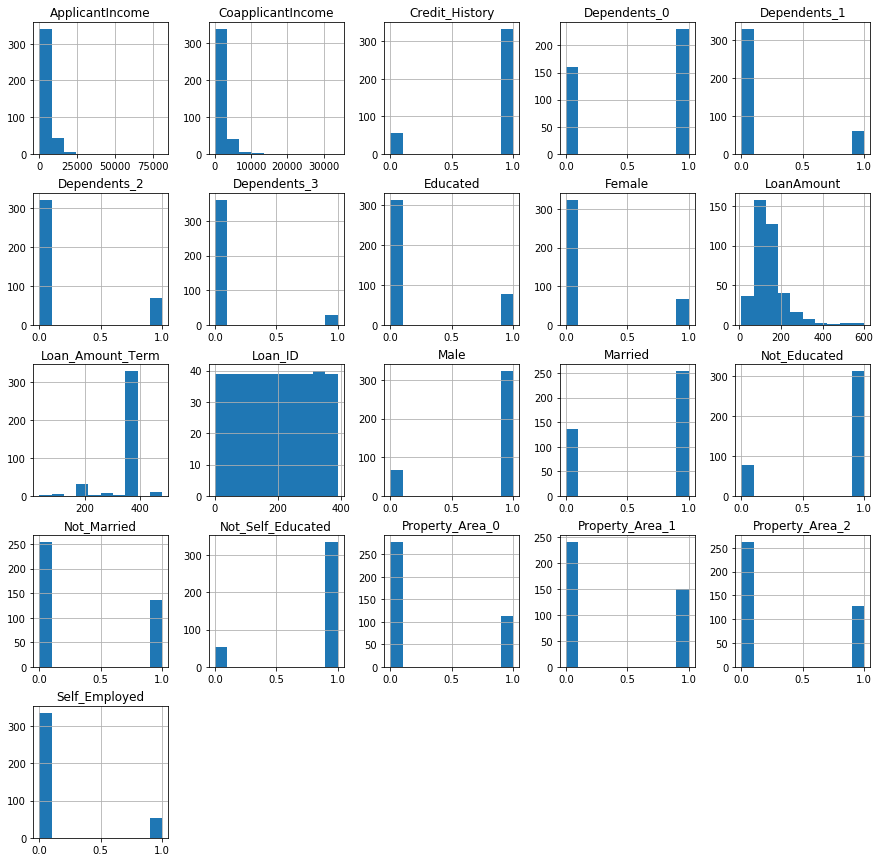

In [ ]:
import matplotlib.pyplot as plt

# compute histograms of some numeric features (you can see the ranges)
train_dataset_no_nans[train_dataset_no_nans.dtypes[(train_dataset_no_nans.dtypes=="float64") | (train_dataset_no_nans.dtypes=="int64")].index.values].hist(figsize=[15,15])  # the syymbol '|' means 'or'



In [ ]:
sampleClassBias = train_labels['Target'].value_counts()
print('Training Labels distribution:')
print(sampleClassBias)

sampleClassBias = test_labels['Target'].value_counts()
print('Test Labels distribution:')
print(sampleClassBias)

Training Labels distribution:
1    276
0    115
Name: Target, dtype: int64
Test Labels distribution:
Y    61
N    35
Name: Target, dtype: int64


##5.  Feature Scaling

When the data is comprised of feature values with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. 


###5.1 Implementing Feature Scaling

Feature scaling is a method used to scale the range of variables/values of features. 

>![feature scaling](https://drive.google.com/uc?id=1loaMbVo_7ZJo53Ogv7I0XMG_wSOOYBxI)

>  Figure : Feature Scaling methods
> Where X is the observation feature.

There are several ways of scaling the data. One way is called **Standardisation** which may be used. For every observation of the selected column, our program will apply the formula of standardisation and fit it to a scale. That is for each observation and each feature within the mean value is withdrawn (subtracted ) from all the values of the feature and divide by the standard deviation. 
The other common type of scaling is **normalisation** where the minimal value of all the feature values is subtracted from the observation feature X and divided by the difference between the max of the feature values and the min of the feature values.

**It is not essential to understand the math behind these methods, what is important is to remember that the variables are being put in the same range / same scale so that no variable is dominated by another.**


In [ ]:
#normalisation
ddummy = train_dataset_no_nans.copy()


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]=min_max.fit_transform(train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

train_dataset_no_nans

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,11,0.0,0.0,0.061646,0.000000,0.196277,0.729730,1.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,12,0.0,0.0,0.059369,0.000000,0.196277,0.729730,1.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,156,1.0,0.0,0.033791,0.054467,0.192893,1.000000,1.00000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,372,1.0,0.0,0.035250,0.100955,0.079526,0.324324,1.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,155,1.0,0.0,0.118157,0.000000,0.174281,0.729730,1.00000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,241,1.0,0.0,0.027001,0.071431,0.214890,0.729730,1.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,163,1.0,0.0,0.063080,0.000000,0.143824,0.729730,1.00000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7,293,1.0,0.0,0.051738,0.072435,0.170897,0.729730,1.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,363,1.0,0.0,0.073902,0.048024,0.301184,1.000000,1.00000,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,112,0.0,0.0,0.027001,0.042882,0.157360,1.000000,0.00000,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#TestDataset
#normalisation
ddummy = test_dataset_no_nans.copy()


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
test_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]=min_max.fit_transform(test_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

We dont need to apply feature scalling on target labels. The label is a categorical value that takes 2 values either no (0) or yes (1).  It is a classification problem.


In [ ]:
# Standardisation
train_dataset_no_nans1 = ddummy.copy()

#Standardizing 
from sklearn.preprocessing import scale
train_dataset_no_nans1[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]=scale(train_dataset_no_nans1[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
train_dataset_no_nans1

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,11,0.0,0.0,0.000000,-6.052008e-01,-0.220196,0.276053,0.409993,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,12,0.0,0.0,-0.035029,-6.052008e-01,-0.220196,0.276053,0.409993,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,156,1.0,0.0,-0.428626,1.010814e-01,-0.246966,2.102325,0.409993,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,372,1.0,0.0,-0.406167,7.038930e-01,-1.143745,-2.463354,0.409993,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,155,1.0,0.0,0.869596,-6.052008e-01,-0.394198,0.276053,0.409993,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,241,1.0,0.0,-0.533115,3.210520e-01,-0.072964,0.276053,0.409993,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,163,1.0,0.0,0.022069,-6.052008e-01,-0.635124,0.276053,0.409993,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
7,293,1.0,0.0,-0.152461,3.340817e-01,-0.420968,0.276053,0.409993,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,363,1.0,0.0,0.188605,1.753851e-02,0.609659,2.102325,0.409993,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,112,0.0,0.0,-0.533115,-4.914249e-02,-0.528046,2.102325,-2.445318,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#TestDataset
# Standardisation
test_dataset_no_nans1 = ddummy.copy()

#Standardizing 
from sklearn.preprocessing import scale
test_dataset_no_nans1[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]=scale(test_dataset_no_nans1[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
test_dataset_no_nans1

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,87,0.0,0.0,-0.411170,-0.624105,-0.641526,0.289455,0.430331,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,47,1.0,0.0,1.218050,-0.624105,2.842384,0.289455,0.430331,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7,1.0,0.0,-0.542289,0.840876,-0.386108,0.289455,0.430331,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,12,1.0,0.0,-0.325506,-0.624105,-1.101280,-1.626934,0.430331,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,75,1.0,0.0,-0.344300,-0.624105,-0.631310,0.289455,0.430331,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1,0.0,0.0,-0.636549,0.471929,-0.447408,0.289455,0.430331,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6,15,1.0,0.0,-0.281800,0.635177,-0.253290,-2.585129,0.430331,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3,1.0,0.0,-0.527720,0.113402,-0.426975,0.289455,-2.323790,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,92,0.0,0.0,-0.591094,-0.624105,-0.896945,0.289455,0.430331,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,77,1.0,1.0,-0.403886,0.178238,0.042995,0.289455,0.430331,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##############################################################################
##############################################################################
##############################################################################
##############################################################################





## Acitivity no. 4

Performing normalisation on the other features too.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2eba7f090>,
      dtype=object)

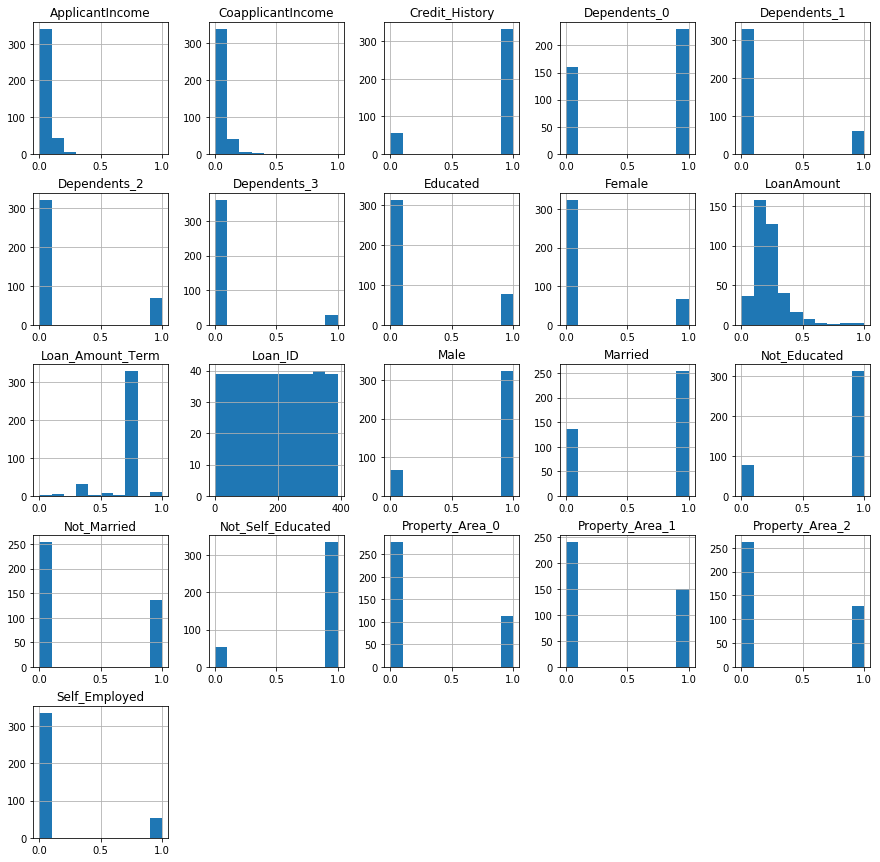

In [ ]:
# This below comment box is just written for self help to know the column names 
# Index([u'Loan_ID', u'Married', u'Self_Employed', u'ApplicantIncome',
#        u'CoapplicantIncome', u'LoanAmount', u'Loan_Amount_Term',
#        u'Credit_History', u'Female', u'Male', u'Not_Married', u'Dependents_0',
#        u'Dependents_1', u'Dependents_2', u'Dependents_3', u'Educated',
#        u'Not_Educated', u'Not_Self_Educated', u'Property_Area_0',
#        u'Property_Area_1', u'Property_Area_2'],
#       dtype='object'

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
train_dataset_no_nans[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']]=min_max.fit_transform(train_dataset_no_nans[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']])

train_dataset_no_nans

In [ ]:
# TestDataset

# This below comment box is just written for self help to know the column names 
# Index([u'Loan_ID', u'Married', u'Self_Employed', u'ApplicantIncome',
#        u'CoapplicantIncome', u'LoanAmount', u'Loan_Amount_Term',
#        u'Credit_History', u'Female', u'Male', u'Not_Married', u'Dependents_0',
#        u'Dependents_1', u'Dependents_2', u'Dependents_3', u'Educated',
#        u'Not_Educated', u'Not_Self_Educated', u'Property_Area_0',
#        u'Property_Area_1', u'Property_Area_2'],
#       dtype='object'

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
test_dataset_no_nans[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']]=min_max.fit_transform(test_dataset_no_nans[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']])

test_dataset_no_nans

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,87,0.0,0.0,0.060938,0.00000,0.091727,0.729730,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,47,1.0,0.0,0.347873,0.00000,0.705036,0.729730,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7,1.0,0.0,0.037846,0.18980,0.136691,0.729730,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,12,1.0,0.0,0.076025,0.00000,0.010791,0.459459,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,75,1.0,0.0,0.072715,0.00000,0.093525,0.729730,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1,0.0,0.0,0.021245,0.14200,0.125899,0.729730,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6,15,1.0,0.0,0.083722,0.16315,0.160072,0.324324,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3,1.0,0.0,0.040412,0.09555,0.129496,0.729730,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,92,0.0,0.0,0.029250,0.00000,0.046763,0.729730,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,77,1.0,1.0,0.062221,0.10395,0.212230,0.729730,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##  Activity no 5

Performing standardisation on the other features too.



In [ ]:
#Standardizing 
from sklearn.preprocessing import scale
train_dataset_no_nans1[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']]=scale(train_dataset_no_nans1[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']])
train_dataset_no_nans1

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,11,-1.369306,-0.400297,0.000000,-6.052008e-01,-0.220196,0.276053,0.409993,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
1,12,-1.369306,-0.400297,-0.035029,-6.052008e-01,-0.220196,0.276053,0.409993,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
2,156,0.730297,-0.400297,-0.428626,1.010814e-01,-0.246966,2.102325,0.409993,-0.454742,0.454742,...,-1.201561,2.325905,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,1.267544,-0.697633
3,372,0.730297,-0.400297,-0.406167,7.038930e-01,-1.143745,-2.463354,0.409993,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,1.267544,-0.697633
4,155,0.730297,-0.400297,0.869596,-6.052008e-01,-0.394198,0.276053,0.409993,-0.454742,0.454742,...,-1.201561,-0.429940,2.141428,-0.283038,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
5,241,0.730297,-0.400297,-0.533115,3.210520e-01,-0.072964,0.276053,0.409993,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
6,163,0.730297,-0.400297,0.022069,-6.052008e-01,-0.635124,0.276053,0.409993,-0.454742,0.454742,...,-1.201561,-0.429940,-0.466978,3.533095,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
7,293,0.730297,-0.400297,-0.152461,3.340817e-01,-0.420968,0.276053,0.409993,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,-0.499201,0.499201,0.400297,-0.637554,-0.788928,1.433418
8,363,0.730297,-0.400297,0.188605,1.753851e-02,0.609659,2.102325,0.409993,-0.454742,0.454742,...,-1.201561,-0.429940,2.141428,-0.283038,2.003203,-2.003203,0.400297,-0.637554,1.267544,-0.697633
9,112,-1.369306,-0.400297,-0.533115,-4.914249e-02,-0.528046,2.102325,-2.445318,-0.454742,0.454742,...,0.832250,-0.429940,-0.466978,-0.283038,2.003203,-2.003203,0.400297,-0.637554,-0.788928,1.433418


In [ ]:
#TestDatset
 
#Standardizing 
from sklearn.preprocessing import scale
test_dataset_no_nans1[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']]=scale(test_dataset_no_nans1[['Married','Self_Employed','Female','Male','Not_Married','Dependents_0','Dependents_1','Dependents_2','Dependents_3','Educated','Not_Educated','Not_Self_Educated','Property_Area_0','Property_Area_1','Property_Area_2']])
test_dataset_no_nans1

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Educated,Not_Educated,Not_Self_Educated,Property_Area_0,Property_Area_1,Property_Area_2
0,87,-1.320173,-0.377964,-0.411170,-0.624105,-0.641526,0.289455,0.430331,1.949359,-1.949359,...,0.979379,-0.496743,-0.447214,-0.377964,1.889822,-1.889822,0.377964,1.640825,-0.939336,-0.593391
1,47,0.757476,-0.377964,1.218050,-0.624105,2.842384,0.289455,0.430331,-0.512989,0.512989,...,0.979379,-0.496743,-0.447214,-0.377964,-0.529150,0.529150,0.377964,-0.609449,1.064581,-0.593391
2,7,0.757476,-0.377964,-0.542289,0.840876,-0.386108,0.289455,0.430331,-0.512989,0.512989,...,0.979379,-0.496743,-0.447214,-0.377964,-0.529150,0.529150,0.377964,-0.609449,-0.939336,1.685230
3,12,0.757476,-0.377964,-0.325506,-0.624105,-1.101280,-1.626934,0.430331,-0.512989,0.512989,...,-1.021055,2.013115,-0.447214,-0.377964,-0.529150,0.529150,0.377964,-0.609449,-0.939336,1.685230
4,75,0.757476,-0.377964,-0.344300,-0.624105,-0.631310,0.289455,0.430331,-0.512989,0.512989,...,-1.021055,-0.496743,2.236068,-0.377964,-0.529150,0.529150,0.377964,-0.609449,1.064581,-0.593391
5,1,-1.320173,-0.377964,-0.636549,0.471929,-0.447408,0.289455,0.430331,-0.512989,0.512989,...,0.979379,-0.496743,-0.447214,-0.377964,-0.529150,0.529150,0.377964,1.640825,-0.939336,-0.593391
6,15,0.757476,-0.377964,-0.281800,0.635177,-0.253290,-2.585129,0.430331,-0.512989,0.512989,...,-1.021055,-0.496743,2.236068,-0.377964,1.889822,-1.889822,0.377964,-0.609449,-0.939336,1.685230
7,3,0.757476,-0.377964,-0.527720,0.113402,-0.426975,0.289455,-2.323790,-0.512989,0.512989,...,0.979379,-0.496743,-0.447214,-0.377964,1.889822,-1.889822,0.377964,-0.609449,1.064581,-0.593391
8,92,-1.320173,-0.377964,-0.591094,-0.624105,-0.896945,0.289455,0.430331,1.949359,-1.949359,...,0.979379,-0.496743,-0.447214,-0.377964,1.889822,-1.889822,0.377964,-0.609449,1.064581,-0.593391
9,77,0.757476,2.645751,-0.403886,0.178238,0.042995,0.289455,0.430331,-0.512989,0.512989,...,-1.021055,2.013115,-0.447214,-0.377964,-0.529150,0.529150,-2.645751,-0.609449,1.064581,-0.593391


##############################################################################
##############################################################################
##############################################################################
##############################################################################





##7. Final

The steps below can be used as a base for ML projects with small variation.

##  Acitivity no 6

Perform all the previous data pre-processing steps to the test data and labels.

In [ ]:
#  All the Code blocks starting with "#TestDataset" have the code for all the pre-processing for test_data and test_labels

Next I provide a standard classifier so that you perform some tests

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_dataset_no_nans1, train_labels['Target'])  
## we train the classifier with the training data and labels: train_dataset_no_nans1 should be the training dataframe after:  
## i) filling in all missing values, ii) encoding all categorical features and (maybe) after feature scaling

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans1 (same pre-processing as before shoud have been performed) and the test labels (after encoding)
accuracy_score(test_labels['Target'],knn.predict(test_dataset_no_nans1))

0.6145833333333334

##  Possible future work

Test the performance of the classifier when:

- the label encoder has been used and no feature scaling has been performed
- the label encoder has been used and normalisation has been performed 
- the label encoder has been used and standardisation has been performed 
- the one-hot encoder has been used and no feature scaling has been performed
- the one-hot encoder has been used and normalisation has been performed 
- the one-hot encoder has been used and standardisation has been performed 

Maybe the performance can be further improved? Have a look at the features used and think whether data quality assessment can be performed.